# Overview

Instead of having a file for every small test of a class, this notebook is intended for testing concepts. From file conversion code to data generation code.
The requirement are that every cell has to:
- be concise and self sustained.
- have a description of what it does

In [1]:
%load_ext autoreload
%autoreload 2

## Dense Descriptors Experiments

### Evaluating optimizer

NOTICE:    Broken after recent updates...

In [ ]:
import os
import cv2
from utils.habitat.datatools import HabitatDataloader
from utils.optim.interactive_dense_descriptor_optimizer import DenseDescriptorInteractiveOptimizer

if __name__=="__main__":
    meta_file = os.path.abspath('./data/archived/moving-can/metadata.json')
    dataloader = HabitatDataloader(meta_file)

    interactive_optim = DenseDescriptorInteractiveOptimizer(
                                cam_intrinsic=dataloader.intrinsic(), 
                                optim_type=['grad'], 
                                save_images=True)

    rgb, d = dataloader[0][0], dataloader[0][1]
    interactive_optim.set_source_data(rgb, d)

    print('Select pixel to proceed...')
    while not interactive_optim._pixels_selected: cv2.waitKey(250)
    # for eps in range(0, len(dataloader)):
    for eps in [len(dataloader)-1]:
        rgb, d = dataloader[eps][0], dataloader[eps][1]
        se3_dict = interactive_optim.match_new_target(rgb, d, f'target {eps}')
    input('press key to process next image...')


## NOCS and Datagen

### Testing NOCS rendering
tests the class that generates nocs given glb models using trimesh.

In [ ]:
from utils.habitat.nocstools import MeshNocsRenderer
import matplotlib.pyplot as plt
import numpy as np
import cv2

if __name__ == '__main__':
    r = MeshNocsRenderer(np.array([960, 544]), 105, '/home/baldeeb/Code/habitat-datagen-utils/data/objects/myobjects/VisitorChair.glb')

    t = np.eye(4)
    t[0:3, 3] = np.array([0.0, 0.0, 5.0])

    r._scene.camera_transform = t

    img = r._scene.save_image(visible=True)
    buff = np.frombuffer(img, np.uint8).flatten()
    nocs = cv2.imdecode(buff, cv2.IMREAD_COLOR)
    plt.imshow(nocs)
    plt.show()

### Testing obj to glb conversion

Uses trimesh to denormalizes and exports obj as glb

NOTICE: failed efforts

In [1]:
from utils.obj_to_glb import obj_to_glb

class ArgsForObjToGlb:
    source='/home/baldeeb/Code/DINO-ViT-Experiments/data/downloaded/objects/office_chair_models-20230215T191917Z-001'
    target=None#'/home/baldeeb/Code/DINO-ViT-Experiments/data/obj_for_testing/model_normalized.glb'
    add_config=True
    denormalize=True
    override=True

obj_to_glb(ArgsForObjToGlb())

converting:
	<---/home/baldeeb/Code/DINO-ViT-Experiments/data/downloaded/objects/office_chair_models-20230215T191917Z-001/office_chair_models/235c8ef29ef5fc5bafd49046c1129780/models/model_normalized.obj
	-->/home/baldeeb/Code/DINO-ViT-Experiments/data/downloaded/objects/office_chair_models-20230215T191917Z-001/office_chair_models/235c8ef29ef5fc5bafd49046c1129780/models/model_normalized.glb

	added config file: model_normalized.glb
converting:
	<---/home/baldeeb/Code/DINO-ViT-Experiments/data/downloaded/objects/office_chair_models-20230215T191917Z-001/office_chair_models/9368cd9028151e1e9d51a07a5989d077/models/model_normalized.obj
	-->/home/baldeeb/Code/DINO-ViT-Experiments/data/downloaded/objects/office_chair_models-20230215T191917Z-001/office_chair_models/9368cd9028151e1e9d51a07a5989d077/models/model_normalized.glb

	added config file: model_normalized.glb
converting:
	<---/home/baldeeb/Code/DINO-ViT-Experiments/data/downloaded/objects/office_chair_models-20230215T191917Z-001/office_c

Rename old data

In [1]:
import os

root_path = "/home/baldeeb/Code/nocs_catkin_ws/src/nocs_ros_pkg/src/nocs/data/habitat"

def rename_files(file_path):
    fname = file_path.split('/')[-1]
    if fname[-13:]=='semantics.png':
        new_path = os.path.join('/', *file_path.split('/')[:-1],f"{fname[:-13]}mask.png")
        os.rename(file_path, new_path)
        print(new_path)
    if fname[-7:]=='rgb.png':
        new_path = os.path.join('/',*file_path.split('/')[:-1],f"{fname[:-7]}color.png")
        os.rename(file_path, new_path)
        print(new_path)
    if fname[-14:]=='coord_meta.txt':
        new_path = os.path.join('/',*file_path.split('/')[:-1],f"{fname[:-14]}meta.txt")
        os.rename(file_path, new_path)
        print(new_path)

def walk_dir(path):
    for root, dirs, files in os.walk(path):
        for file in files:
            rename_files(os.path.join(root, file))
        for dir in dirs:
            walk_dir(os.path.join(root, dir))

walk_dir(root_path)

/home/baldeeb/Code/nocs_catkin_ws/src/nocs_ros_pkg/src/nocs/data/habitat/test/0000/1314_meta.txt
/home/baldeeb/Code/nocs_catkin_ws/src/nocs_ros_pkg/src/nocs/data/habitat/test/0000/1350_meta.txt
/home/baldeeb/Code/nocs_catkin_ws/src/nocs_ros_pkg/src/nocs/data/habitat/test/0000/1321_meta.txt
/home/baldeeb/Code/nocs_catkin_ws/src/nocs_ros_pkg/src/nocs/data/habitat/test/0000/1301_meta.txt
/home/baldeeb/Code/nocs_catkin_ws/src/nocs_ros_pkg/src/nocs/data/habitat/test/0000/1367_meta.txt
/home/baldeeb/Code/nocs_catkin_ws/src/nocs_ros_pkg/src/nocs/data/habitat/test/0000/1328_meta.txt
/home/baldeeb/Code/nocs_catkin_ws/src/nocs_ros_pkg/src/nocs/data/habitat/test/0000/1358_meta.txt
/home/baldeeb/Code/nocs_catkin_ws/src/nocs_ros_pkg/src/nocs/data/habitat/test/0000/1309_meta.txt
/home/baldeeb/Code/nocs_catkin_ws/src/nocs_ros_pkg/src/nocs/data/habitat/test/0000/1311_meta.txt
/home/baldeeb/Code/nocs_catkin_ws/src/nocs_ros_pkg/src/nocs/data/habitat/test/0000/1343_meta.txt
/home/baldeeb/Code/nocs_catkin

Center obj objects and update files.

In [30]:
import pathlib
import shutil
import os
import json
import trimesh
import numpy as np
SOURCE_DIR = '/home/baldeeb/Code/DINO-ViT-Experiments/data/downloaded/objects/office_chair_models-20230215T191917Z-001'
TARGET_DIR = '/home/baldeeb/Code/DINO-ViT-Experiments/data/downloaded/objects/centered_office_chair_models-20230215T191917Z-001'

if os.path.isdir(TARGET_DIR): shutil.rmtree(TARGET_DIR)
shutil.copytree(SOURCE_DIR, TARGET_DIR)


obj_dir_path = pathlib.Path(TARGET_DIR)
for obj in obj_dir_path.rglob('*.obj'):
    # Center mesh
    scene = trimesh.load_mesh(str(obj))
    
    meshlist = [m for m in scene.geometry.values()]
    mesh = trimesh.util.concatenate(meshlist)
    mesh.vertices -= (np.max(mesh.vertices, axis=0) + np.min(mesh.vertices, axis=0)) * 0.5
    mesh.export(str(obj))

    # Fix Json file
    json_path = obj.parent / (obj.stem + '.json')
    with open(json_path, 'r') as f:
        json_data = json.load(f)
        json_data['centroid'] = [0.0, 0.0, 0.0]
        json_data['max'] = np.max(mesh.vertices, axis=0).tolist()
        json_data['min'] = np.min(mesh.vertices, axis=0).tolist()
        json_data['scale'] = (2.0 * np.max(mesh.vertices, axis=0)).tolist()
    json.dump(json_data, open(json_path, 'w'))


concatenating texture: may result in visual artifacts
concatenating texture: may result in visual artifacts
concatenating texture: may result in visual artifacts
concatenating texture: may result in visual artifacts
concatenating texture: may result in visual artifacts


## Energy-based-models

### Testing Mask sampling for ebm training

/home/baldeeb/miniconda3/envs/dino-3-7/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


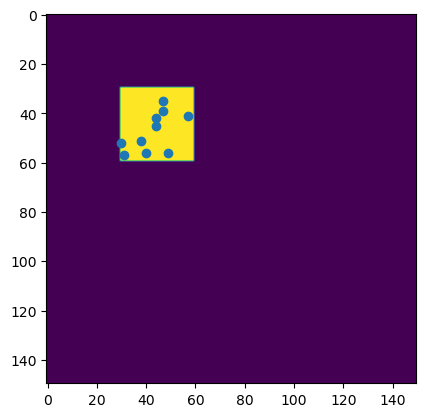

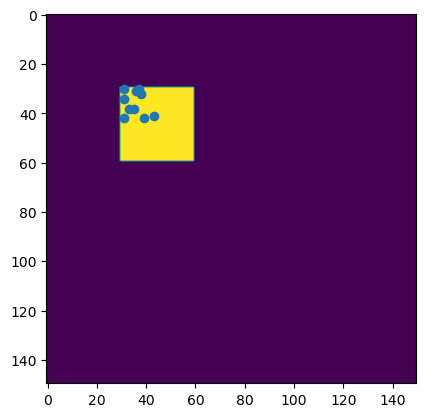

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from energy_experiments.ebm import select_mask_corner, randomly_sample_from_mask

A = np.zeros((150, 150))
A[30:60, 30:60] = 1
f, s = select_mask_corner(A)

plt.figure(); plt.imshow(A)
i_list, j_list = randomly_sample_from_mask(s, 10)
plt.scatter(i_list, j_list)

plt.figure(); plt.imshow(A)
i_list, j_list = randomly_sample_from_mask(f, 10)
plt.scatter(i_list, j_list)

### Testing parts of the ebm model.

TNet is breaking gradiants. investigating whay that is the case


In [2]:
from energy_experiments.ebm import TNet
import torch

in_ch, in_pts = 3, 5
t_net = TNet(in_ch, in_pts).cuda()
data = torch.rand(2, 3, 5).cuda().requires_grad_(True)
opt = torch.optim.Adam([data])

print(data[0, 0])
result = t_net(data)
loss = result.mean()

print(data[0, 0])
opt.zero_grad()
loss.backward()
opt.step()
print(data[0, 0])

tensor([0.8891, 0.4659, 0.5312, 0.7278, 0.9208], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor([0.8891, 0.4659, 0.5312, 0.7278, 0.9208], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor([0.8881, 0.4649, 0.5302, 0.7288, 0.9218], device='cuda:0',
       grad_fn=<SelectBackward0>)


## Scratch 

In [11]:
import numpy as np

# min max of bbox as listed in json file
fmax = np.array([0.342255, 0.985131, 0.653939])
fmin = np.array([-0.339761, 0.0, 0.00119735])
fn = np.linalg.norm(fmax - fmin)

# min max of bbox as determined by habitat
hmax = np.array([0.38100806, 0.5325654, 0.3663703])
hmin = np.array([-0.38100806, -0.5325654, -0.3663703])
hn = np.linalg.norm(hmax - hmin)


fn/hn * (0.6823529411764706 + 0.023529411764705882)





fmin, fmax = np.array([0.02745098, 0.02745098, 0.02352941]), np.array([0.4745098,  0.68235294, 0.44705882])
np.linalg.norm(fmax - fmin)* fn/hn


fn, hn

(1.3644414875917994, 1.5006934980657622)

# Shapenet tools

## Folder of select object links

In this part we would like to create a folder with sybmolic links to filtered objects

Using the shapenet [taxonomy viewer](https://shapenet.org/taxonomy-viewer) one can filter objects using key terms. After filtering, one can download a meta file containing details about the filtered objects.

This code should take in this meta file and make a folder with links to each chair listed in it.

In [3]:
# find those files
# assume the meta file is in the same directory as objects
import pathlib
from utils.shapenet_tools import (get_shapenet_obj_ids_from_meta_file, 
                                    get_target_folders_in_path,
                                    create_symlinks)

META_FILE = '/home/baldeeb/Data/shapenet/ShapeNetCore.v2/swivel_chair_meta.csv'
SYMLINKS_DIR = pathlib.Path(META_FILE).parent / 'swivel_chair_models'
OBJECTS_DIR = pathlib.Path(META_FILE).parent

obj_ids = get_shapenet_obj_ids_from_meta_file(META_FILE)
object_folders = list(get_target_folders_in_path(OBJECTS_DIR, obj_ids))
create_symlinks(SYMLINKS_DIR, object_folders)

print(f'Found {len(object_folders)} objects our of {len(obj_ids)}')

Found 408 objects our of 408
